In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.tree import DecisionTreeClassifier

#### 데이터 불러오기

In [242]:
dataset=pd.read_csv("18-21데이터통합.csv",encoding='cp949')

#### 변수

In [243]:
print("Keys of iris_dataset:\n", dataset.keys())

Keys of iris_dataset:
 Index(['movie title', ' Daudience ', ' A1audience ', ' A2audience ',
       ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ',
       ' Season ', ' Month ', ' Actscore ', ' social distancing ', ' labels '],
      dtype='object')


In [244]:
dataset.head()

,movie title,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,Month,Actscore,social distancing,labels
0,신과함께-인과 연,1246603,7339492,10099813,1967,2097,1108,0,12,3,8,10,0,5
1,어벤져스: 인피니티 워,980042,5977606,11775978,2460,2141,1615,1,12,1,4,7,0,5
2,보헤미안 랩소디,110477,874499,2061545,811,898,735,1,12,3,10,0,0,5
3,미션 임파서블: 폴아웃,601935,4135912,5785977,1717,1881,532,1,15,2,7,7,0,4
4,쥬라기 월드: 폴른 킹덤,1183496,3553008,4846217,1932,1772,930,1,12,2,6,2,0,4


In [245]:
dataset.tail()

,movie title,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,Month,Actscore,social distancing,labels
150,나쁜 녀석들: 포에버,62608,402585,494139,876,896,302,1,19,4,1,3,0,0
151,국제수사,86468,407561,483144,1000,948,526,0,15,4,9,15,2,0
152,침입자,50416,316514,425085,1241,1224,823,0,15,4,6,7,1,0
153,장르만 로맨스,57130,331725,434581,1135,1175,688,0,15,4,11,12,0,0
154,스타워즈: 라이즈 오브 스카이워커,74338,381509,447647,957,881,445,1,12,4,1,1,0,0


In [246]:
dataset.shape

(155, 14)

In [247]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   movie title          155 non-null    object
 1    Daudience           155 non-null    int64 
 2    A1audience          155 non-null    int64 
 3    A2audience          155 non-null    int64 
 4    Dscreen             155 non-null    int64 
 5    A1screen            155 non-null    int64 
 6    A2screen            155 non-null    int64 
 7    Nationality         155 non-null    int64 
 8    Grade               155 non-null    int64 
 9    Season              155 non-null    int64 
 10   Month               155 non-null    int64 
 11   Actscore            155 non-null    int64 
 12   social distancing   155 non-null    int64 
 13   labels              155 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 17.1+ KB


In [248]:
print(dataset.describe())

         Daudience    A1audience    A2audience      Dscreen      A1screen   \
count  1.550000e+02  1.550000e+02  1.550000e+02   155.000000    155.000000   
mean   2.155538e+05  1.405813e+06  2.135450e+06  1210.574194   1302.567742   
std    2.176199e+05  1.263165e+06  2.064832e+06   464.958593   1099.819088   
min    2.678500e+04  1.559560e+05  2.490150e+05   586.000000    388.000000   
25%    8.584750e+04  7.143295e+05  9.807290e+05   921.500000    897.000000   
50%    1.399650e+05  1.060001e+06  1.513030e+06  1063.000000   1101.000000   
75%    2.709490e+05  1.596816e+06  2.387492e+06  1358.500000   1343.000000   
max    1.339353e+06  7.339492e+06  1.177598e+07  2816.000000  13553.000000   

         A2screen    Nationality       Grade      Season       Month   \
count   155.000000     155.000000  155.000000  155.000000  155.000000   
mean    889.000000       0.438710   12.148387    3.058065    6.535484   
std     414.635719       0.497838    4.798259    1.140965    3.569855   
min  

In [249]:
dataset[' social distancing '].value_counts()

0    123
4     13
2      9
1      8
3      2
Name:  social distancing , dtype: int64

In [250]:
dataset[' Month '].value_counts()

1     18
8     16
7     15
2     15
10    14
9     14
6     13
12    13
11    12
5     10
3     10
4      5
Name:  Month , dtype: int64

In [251]:
dataset[' Season '].value_counts()

4    81
3    26
1    24
2    24
Name:  Season , dtype: int64

In [252]:
dataset[' Nationality '].value_counts()

0    87
1    68
Name:  Nationality , dtype: int64

In [253]:
dataset[' Actscore '].value_counts()

3     15
7     14
6     13
2     13
1     13
10    10
4     10
0      8
5      8
17     7
8      7
9      6
13     6
12     6
14     4
11     3
19     3
15     2
18     2
20     2
25     1
16     1
21     1
Name:  Actscore , dtype: int64

In [254]:
dataset.corr()

,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,Month,Actscore,social distancing,labels
Daudience,1.000000,0.893360,0.837085,0.601362,0.214575,0.401340,0.120783,0.075611,-0.255363,0.052734,0.098335,-0.191994,0.684586
A1audience,0.893360,1.000000,0.975508,0.554923,0.171923,0.405067,0.059361,0.011128,-0.311821,0.048021,0.134175,-0.272898,0.817258
A2audience,0.837085,0.975508,1.000000,0.519669,0.160977,0.436819,0.039344,-0.008636,-0.316691,0.015530,0.140059,-0.267022,0.833572
Dscreen,0.601362,0.554923,0.519669,1.000000,0.421247,0.762972,0.202905,0.005719,0.101030,0.219637,0.108454,0.264442,0.467522
A1screen,0.214575,0.171923,0.160977,0.421247,1.000000,0.357719,0.004998,0.094896,0.110138,0.082384,-0.044580,0.357313,0.112611
A2screen,0.401340,0.405067,0.436819,0.762972,0.357719,1.000000,0.059832,-0.012373,0.111838,0.101110,0.191022,0.353224,0.451962
Nationality,0.120783,0.059361,0.039344,0.202905,0.004998,0.059832,1.000000,-0.342759,-0.068001,-0.041700,-0.546902,0.066424,0.066515
Grade,0.075611,0.011128,-0.008636,0.005719,0.094896,-0.012373,-0.342759,1.000000,0.044674,0.129530,0.255984,-0.017334,-0.077703
Season,-0.255363,-0.311821,-0.316691,0.101030,0.110138,0.111838,-0.068001,0.044674,1.000000,0.094349,0.075286,0.372976,-0.379926
Month,0.052734,0.048021,0.015530,0.219637,0.082384,0.101110,-0.041700,0.129530,0.094349,1.000000,0.104612,0.103986,0.054210


In [255]:
dataset.sort_values(by=' Actscore ',ascending=False)

,movie title,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,Month,Actscore,social distancing,labels
8,완벽한 타인,274118,2028918,3573036,1081,1214,823,0,15,3,10,25,0,4
92,퍼펙트맨,176207,766240,1083592,894,811,677,0,15,3,10,21,0,1
107,이터널스,297871,1614946,2061128,2578,2612,1932,1,12,4,11,20,0,3
103,남산의 부장들,257743,2604649,3874419,1363,1659,1362,0,15,4,1,20,0,3
74,시동,286830,1421303,2525986,1515,890,843,0,15,4,12,19,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,코코,106921,1152061,1995555,937,751,669,1,0,1,1,0,0,3
51,더 넌,98719,731193,992952,682,679,510,1,15,3,9,0,0,1
7,블랙 팬서,630461,3509510,4675288,1449,1313,701,1,12,4,2,0,0,4
2,보헤미안 랩소디,110477,874499,2061545,811,898,735,1,12,3,10,0,0,5


In [256]:
ActScore = dataset[' Actscore ']
Grade = dataset[' Grade ']
labels = dataset[' labels ']
socialdistancing = dataset[' social distancing ']
month = dataset[' Month ']
season = dataset[' Season ']
nationality = dataset[' Nationality ']

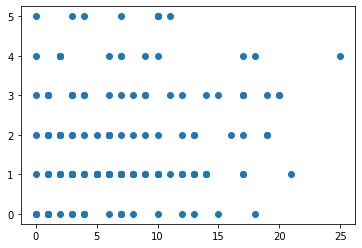

In [257]:
plt.scatter(ActScore,labels)

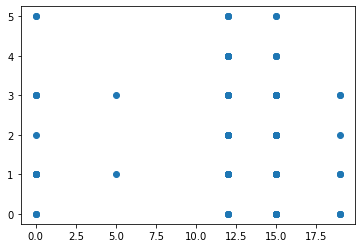

In [258]:
plt.scatter(Grade,labels)

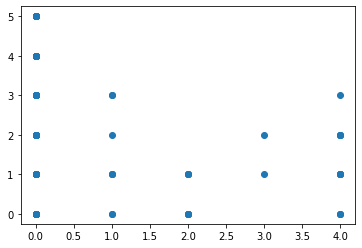

In [259]:
plt.scatter(socialdistancing,labels)

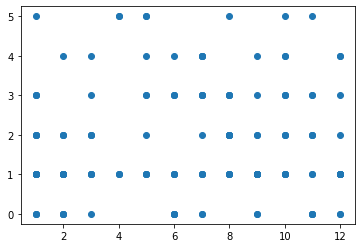

In [260]:
plt.scatter(month,labels)

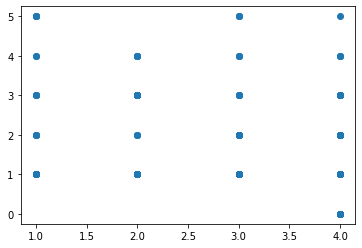

In [261]:
plt.scatter(season,labels)

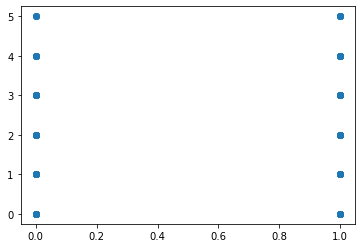

In [262]:
plt.scatter(nationality,labels)

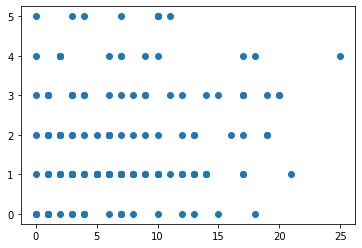

In [263]:
plt.scatter(ActScore,labels)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset[[' Daudience ', ' A1audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ', ' Season ', ' Month ', ' Actscore ', ' social distancing ']], dataset[' labels '], test_size=0.3, random_state=42)

#### 데이터 split

In [265]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (108, 11)
y_train shape: (108,)


In [266]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (47, 11)
y_test shape: (47,)


# SVM

#### Nationality, Grade, Season , Month, Socialdisatancing의 범주형 변수와 Actscore 을 제외한 관객수와 스크린수에 관련한
#### 변수의 최대 최소값은 상당한 차이가 있음을 알 수 있다. -> Scaling의 필요성

In [366]:
from sklearn.model_selection import cross_val_score,cross_validate
print("Daudience 범위: ", "[", min(X_train.iloc[:,0]), ",", max(X_train.iloc[:,0]), "]")
print("A1audience 범위: ", "[", min(X_train.iloc[:,1]), ",", max(X_train.iloc[:,1]), "]")
print("A2audience 범위: ", "[", min(X_train.iloc[:,2]), ",", max(X_train.iloc[:,2]), "]")
print("Dscreen 범위: ", "[", min(X_train.iloc[:,3]), ",", max(X_train.iloc[:,3]), "]")
print("A1screen 범위: ", "[", min(X_train.iloc[:,4]), ",", max(X_train.iloc[:,4]), "]")
print("A2screen 범위: ", "[", min(X_train.iloc[:,5]), ",", max(X_train.iloc[:,5]), "]")
print("Nationality 범위: ", "[", min(X_train.iloc[:,6]), ",", max(X_train.iloc[:,6]), "]")
print("Grade 범위: ", "[", min(X_train.iloc[:,7]), ",", max(X_train.iloc[:,7]), "]")
print("Season 범위: ", "[", min(X_train.iloc[:,8]), ",", max(X_train.iloc[:,8]), "]")
print("Month 범위: ", "[", min(X_train.iloc[:,9]), ",", max(X_train.iloc[:,9]), "]")
print("Actscore 범위: ", "[", min(X_train.iloc[:,10]), ",", max(X_train.iloc[:,10]), "]")
print("Socialdistancing 범위: ", "[", min(X_train.iloc[:,11]), ",", max(X_train.iloc[:,11]), "]")

Daudience 범위:  [ 26785 , 1339353 ]
A1audience 범위:  [ 155956 , 7339492 ]
A2audience 범위:  [ 249015 , 11775978 ]
Dscreen 범위:  [ 586 , 2816 ]
A1screen 범위:  [ 388 , 13553 ]
A2screen 범위:  [ 65 , 2320 ]
Nationality 범위:  [ 0 , 25 ]
Grade 범위:  [ 0 , 1 ]
Season 범위:  [ 0 , 19 ]
Month 범위:  [ 1 , 4 ]
Actscore 범위:  [ 1 , 12 ]
Socialdistancing 범위:  [ 0 , 4 ]


In [268]:
from sklearn.svm import SVC

### 우선 가볍게 C=0.1 gamma=1 디폴트인 rbf커널로 학습시켜보았다.

In [269]:
svm_model = SVC( C=0.1, gamma=0.1)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

In [270]:
y_pred = svm_model.predict(X_test)
print("예측된 라벨:", y_pred)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

예측된 라벨: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
prediction accuracy: 0.40


### 모두 라벨 1을 가리키는, 0.4의 정확도를 보이며 상당히 예측이 잘못되었음을 시사한다.

In [272]:
svm_model2 = SVC(kernel='rbf', C=0.1, gamma='auto')
svm_model2.fit(X_train, y_train)

SVC(C=0.1, gamma='auto')

In [273]:
y_pred2 = svm_model2.predict(X_test)

### 감마값을 높여서 진행하여도 동일한 결과를 얻었다. 

In [274]:
print("예측된 라벨:", y_pred2)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred2 == y_test)))

예측된 라벨: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
prediction accuracy: 0.40


### 예측정확도를 얻기위해 파라미터값을 다양하게 변경해가며 최적의 하이퍼 파라미터 찾기위한 그리드 서치를 사용하였다.
### 우리의 분류 label은 0,1,2,3,4 의 총 5개로 rbf커널로 진행하여 실행하는것으로 하였다.

In [275]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1 , 1 , 10 , 100 , 1000]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [276]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
4,10.000,0.712963
5,100.000,0.712963
6,1000.000,0.712963
3,1.000,0.611111
0,0.001,0.379630
1,0.010,0.379630
2,0.100,0.379630


### C 값이 10일때 가장 높은 정확도인 0.78을 보임으로 근처의 값을 몇개 더 실행하여 보았다.

In [277]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [ 5 , 7 , 12 , 25]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=100),
             param_grid={'C': [5, 7, 12, 25]})

In [278]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
0,5,0.712963
2,12,0.712963
1,7,0.703704
3,25,0.694444


In [279]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [ 6, 11 ] }
grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=100), param_grid={'C': [6, 11]})

In [280]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
1,11,0.712963
0,6,0.703704


### C값이 5, , 11, 12 일때 가장 높은 정확도를 보임을 알 수 있다.
### gamma값도 다루어 보자. 기준이 된 C=10의값과 최적의 값이었던 5, 11, 12 값을 C값으로 할당하여 감마값을 변화시켜보기로 하였다.

In [281]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [5 , 10 , 11 ,12 ],
             'gamma':[ 0.001, 0.01 , 0,1 , 1 ,10]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 6)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=SVC(random_state=100),
             param_grid={'C': [5, 10, 11, 12],
                         'gamma': [0.001, 0.01, 0, 1, 1, 10]})

In [282]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
0,5,0.001,0.37963
1,5,0.010,0.37963
22,12,1.000,0.37963
21,12,1.000,0.37963
20,12,0.000,0.37963
19,12,0.010,0.37963
18,12,0.001,0.37963
17,11,10.000,0.37963
16,11,1.000,0.37963
15,11,1.000,0.37963


#### 가장 정확도가 높았던 C에대해서 감마값의 변화만 주었을때는 낮은 정확도가 발생, C값과 감마값을 동시에 변화시켜보는것으로 함

In [283]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100 , 200],
             'gamma':[0.001, 0.01, 0.1, 1 , 10]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 4)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [284]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
0,0.001,0.001,0.37963
23,10.000,1.000,0.37963
25,25.000,0.001,0.37963
26,25.000,0.010,0.37963
27,25.000,0.100,0.37963
28,25.000,1.000,0.37963
29,25.000,10.000,0.37963
30,50.000,0.001,0.37963
31,50.000,0.010,0.37963
32,50.000,0.100,0.37963


### 교차검증

In [285]:
scores = cross_val_score(svm_clf, X_train, y_train, cv = 4)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv =4))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6111111111111112


In [286]:
scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6212121212121212


In [287]:
scores = cross_val_score(svm_clf, X_train, y_train, cv = 6)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv =6))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.648148148148148


In [288]:
scores = cross_val_score(svm_clf, X_train, y_train, cv = 7)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv =7))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6297619047619047


C:\Users\seehu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\seehu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  warnings.warn(("The least populated class in y has only %d"


#### 교차검증은 cv=6 트레인 테스트스플릿을 6개로 할당하여 cross_validation한것이 가장 높은값으로 y label이 6개인특성상 cv>7이상에서는 점차 낮은 정확도를 띄게되었다.
#### 표준화 하여 정확도 향상이 있는지 탐색

In [289]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [290]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 표준화 된 x feature에 대하여 실행

In [291]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100 , 200],
             'gamma':[0.001, 0.01, 0.1, 1 , 10]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 6)

grid_svm.fit(X_train_std, y_train)

GridSearchCV(cv=6, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [292]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
21,10.000,0.010,0.601852
41,200.000,0.010,0.592593
31,50.000,0.010,0.592593
36,100.000,0.010,0.592593
26,25.000,0.010,0.583333
30,50.000,0.001,0.574074
35,100.000,0.001,0.574074
40,200.000,0.001,0.564815
22,10.000,0.100,0.555556
42,200.000,0.100,0.546296


In [293]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100 , 200],
             'gamma':[0.001, 0.01, 0.1, 1 , 10]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 4)

grid_svm.fit(X_train_std, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [294]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
41,200.000,0.010,0.648148
36,100.000,0.010,0.620370
31,50.000,0.010,0.592593
21,10.000,0.010,0.592593
35,100.000,0.001,0.583333
40,200.000,0.001,0.574074
17,1.000,0.100,0.564815
22,10.000,0.100,0.564815
26,25.000,0.010,0.564815
27,25.000,0.100,0.555556


In [295]:
svm_clf = SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100 , 200],
             'gamma':[0.001, 0.01, 0.1, 1 , 10]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 5)

grid_svm.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [296]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
36,100.000,0.010,0.592641
21,10.000,0.010,0.592208
31,50.000,0.010,0.583550
35,100.000,0.001,0.583117
40,200.000,0.001,0.564502
26,25.000,0.010,0.555411
41,200.000,0.010,0.555411
27,25.000,0.100,0.545887
17,1.000,0.100,0.545887
30,50.000,0.001,0.545887


#### cv= 4,5,6일때 각각의 값들 , 최적값은 cv=4 C=100, gamma=0.01 
#### 교차검증

In [297]:
scores = cross_val_score(svm_clf, X_train_std, y_train, cv = 4)
scores

pd.DataFrame(cross_validate(svm_clf, X_train_std, y_train, cv =4))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5555555555555556


In [298]:
scores = cross_val_score(svm_clf, X_train_std, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_train_std, y_train, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5549783549783549


In [299]:
scores = cross_val_score(svm_clf, X_train_std, y_train, cv = 6)
scores

pd.DataFrame(cross_validate(svm_clf, X_train_std, y_train, cv =6))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.537037037037037


#### 모델 생성

In [300]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [301]:
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

#### 성능 확인

In [302]:
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on training set:  1.0
Accuracy on testing set:  0.48936170212765956


#### 최적의 가짓수 확인하기

In [303]:
training_accuracy = []
test_accuracy = []

msl_settings = [2, 3, 4, 5, 6,10,40]
for msl in msl_settings:
    clf = DecisionTreeClassifier(min_samples_leaf= msl, random_state=0)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)
   
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [304]:
result = pd.DataFrame({"min_samples_leaf":msl_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

In [305]:
result

,min_samples_leaf,training accuracy,test accuracy
0,2,0.888889,0.553191
1,3,0.861111,0.531915
2,4,0.851852,0.510638
3,5,0.851852,0.510638
4,6,0.842593,0.531915
5,10,0.787037,0.531915
6,40,0.490741,0.489362


#### 가지치기를 포함하여 모델 생성

In [306]:
clf = DecisionTreeClassifier(min_samples_leaf= 4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=0)

[Text(101.63571428571429, 201.90857142857143, 'X[1] <= 408021.5\ngini = 0.771\nsamples = 108\nvalue = [17, 41, 17, 16, 11, 6]'),
 Text(31.885714285714286, 170.84571428571428, 'X[4] <= 965.0\ngini = 0.198\nsamples = 18\nvalue = [16, 2, 0, 0, 0, 0]'),
 Text(15.942857142857143, 139.78285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0, 0]'),
 Text(47.82857142857143, 139.78285714285715, 'gini = 0.48\nsamples = 5\nvalue = [3, 2, 0, 0, 0, 0]'),
 Text(171.3857142857143, 170.84571428571428, 'X[1] <= 1386402.0\ngini = 0.725\nsamples = 90\nvalue = [1, 39, 17, 16, 11, 6]'),
 Text(79.71428571428572, 139.78285714285715, 'X[4] <= 946.0\ngini = 0.411\nsamples = 51\nvalue = [1, 38, 9, 2, 0, 1]'),
 Text(47.82857142857143, 108.72, 'X[9] <= 1.5\ngini = 0.202\nsamples = 37\nvalue = [1, 33, 1, 1, 0, 1]'),
 Text(31.885714285714286, 77.65714285714284, 'gini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 0, 0, 1]'),
 Text(63.77142857142857, 77.65714285714284, 'X[1] <= 702550.0\ngini = 0.116\nsamples = 3

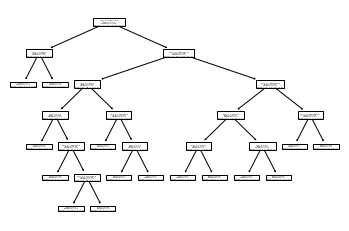

In [307]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

In [308]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=['50만 관객','100만 관객','200만 관객','300만 관객','500만 관객','1000만 관객'],
                 impurity=False, filled=True)

#### 시각화

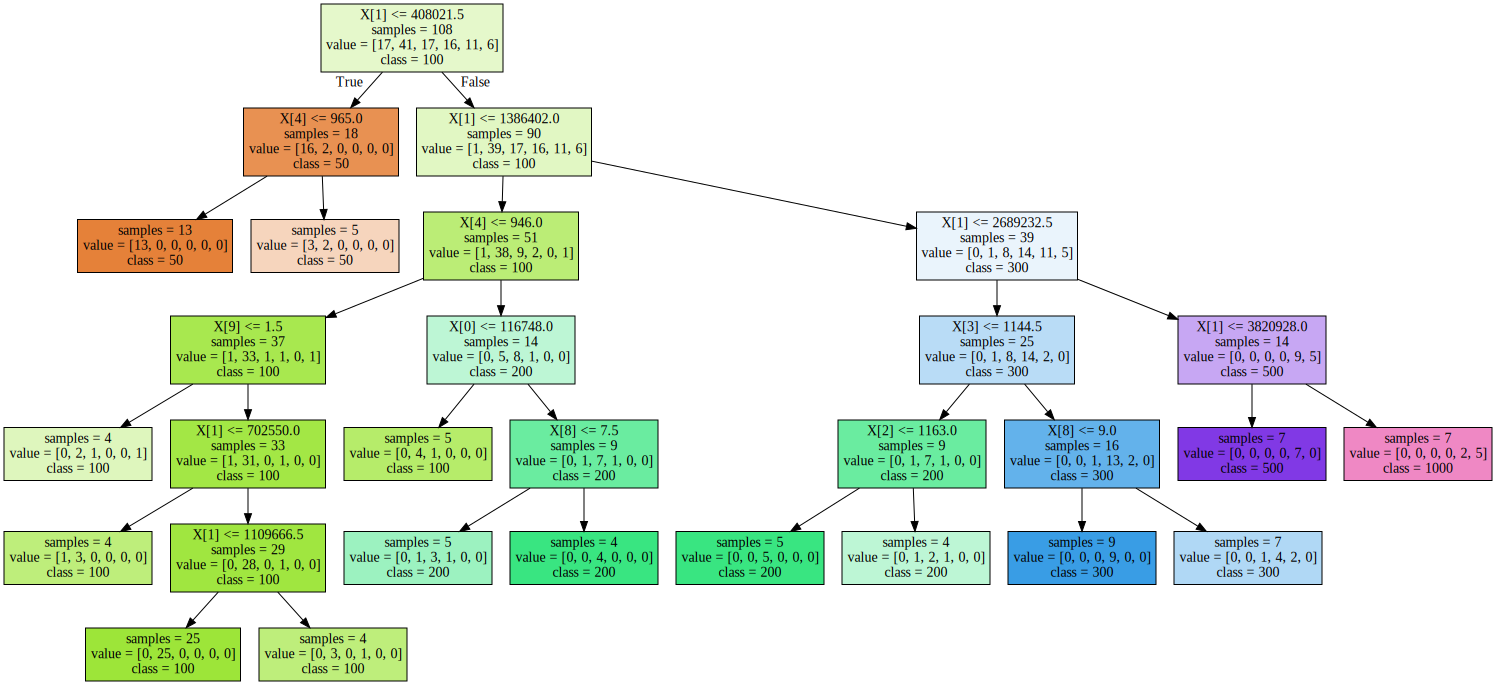

'tree.png'

In [309]:
import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

graphviz.Source(dot_graph).render('tree', format="png")

In [310]:
print("특성 중요도")
print(clf.feature_importances_)

특성 중요도
[0.04282475 0.68641068 0.01352767 0.09645231 0.11533792 0.
 0.         0.         0.02692007 0.0185266  0.        ]


In [311]:
shape=[' Daudience ', ' A1audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ', ' Season ', ' Month ', ' Actscore ', ' social distancing ']

In [312]:
data=dataset.keys().to_list()

#### 변수의 중요도

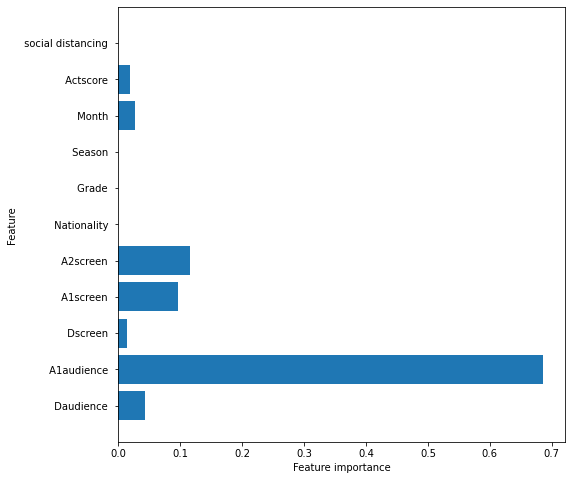

In [313]:
def plot_feature_importances_movie(model):
    n_features = len(shape)
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),shape)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plt.figure(figsize=(8,8))
plot_feature_importances_movie(clf)

Text(0, 0.5, 'A2screen')

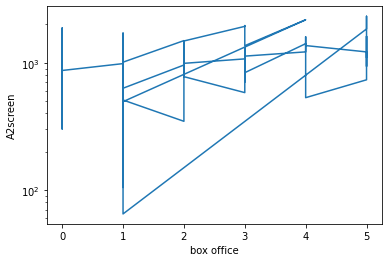

In [314]:
plt.semilogy(dataset[' labels '],dataset[' A2screen '])
plt.xlabel("box office")
plt.ylabel("A2screen")

Text(0, 0.5, 'A1screen')

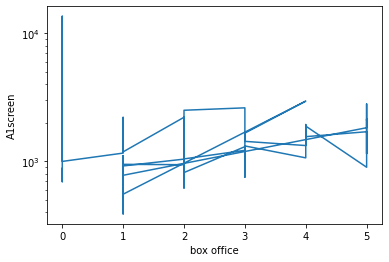

In [315]:
plt.semilogy(dataset[' labels '],dataset[' A1screen '])
plt.xlabel("box office")
plt.ylabel("A1screen")

Text(0, 0.5, 'Actscore')

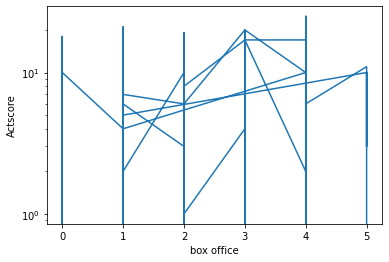

In [316]:
plt.semilogy(dataset[' labels '],dataset[' Actscore '])
plt.xlabel("box office")
plt.ylabel("Actscore")

In [317]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [318]:
index=[' Daudience ', ' A1audience ', ' A2audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Actscore ',' Nationality ', ' Grade ', ' Season ', ' Month ',' social distancing ',' labels ']
X_train=dataset[index]

In [319]:
scaler=MinMaxScaler()  #min_max scale 사용
scaled_var=scaler.fit_transform(X_train[[' Daudience ', ' A1audience ', ' A2audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Actscore ']])
# 중요 변수, 값의 차이가 커서 스케일링 진행해야함.. 
non_scaled_var= X_train[[' Nationality ', ' Grade ', ' Season ', ' Month ',' social distancing ']] #카테고리형&누적관객수
# 중요 변수가 아님.

In [320]:
X_train_scaled=scaled_var 
df_scaled_var=pd.DataFrame(X_train_scaled) #데이터 프레임으로 변환
df_scaled_var.columns=[' Daudience_2 ', ' A1audience_2 ', ' A2audience_2 ', ' Dscreen_2 ', ' A1screen_2 ', ' A2screen_2 ', ' Actscore_2 ']
#열이름 변환
print(df_scaled_var)

      Daudience_2    A1audience_2    A2audience_2    Dscreen_2    A1screen_2   \
0         0.929337        1.000000        0.854587     0.619283      0.129814   
1         0.726253        0.810416        1.000000     0.840359      0.133156   
2         0.063762        0.100026        0.157243     0.100897      0.038739   
3         0.438187        0.554039        0.480349     0.507175      0.113407   
4         0.881258        0.472894        0.398822     0.603587      0.105127   
..             ...             ...             ...          ...           ...   
150       0.027292        0.034333        0.021265     0.130045      0.038587   
151       0.045470        0.035025        0.020311     0.185650      0.042537   
152       0.018004        0.022351        0.015275     0.293722      0.063502   
153       0.023119        0.024468        0.016098     0.246188      0.059780   
154       0.036229        0.031399        0.017232     0.166368      0.037448   

      A2screen_2    Actscor

In [321]:
inertia = []
sil_scores = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_scaled_var)
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled_var, cluster_labels))

In [322]:
inertia

[22.204771430308895,
 17.170951809862686,
 13.426531497585032,
 11.626241300985793,
 10.463605535908268,
 9.262343496577238,
 8.362860002531594,
 7.781081294891378]

In [323]:
sil_scores

[0.4807212070744383,
 0.3296923004090066,
 0.34715802387240446,
 0.3586877401366573,
 0.3401824664127907,
 0.2663272614556704,
 0.2795941924548821,
 0.2635224221106355]

Text(0.5, 1.0, 'K-Means Inertia')

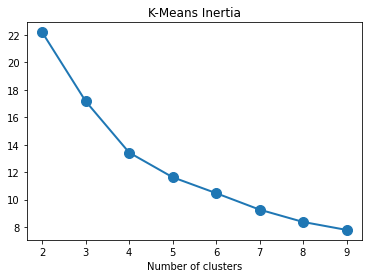

In [324]:
plt.plot(range(2,10), inertia, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")   #적정 클러스터 = 4

Text(0.5, 1.0, 'Silhouette Score')

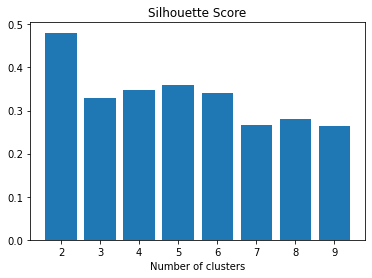

In [325]:
plt.bar(range(2,10), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

In [326]:
#Inertia 와 silhouette score를 종합적으로 판단해 clsuter=4으로 진행
kmeans = KMeans(n_clusters=4) 
kmeans.fit(df_scaled_var)

KMeans(n_clusters=4)

In [327]:
assignments_X_train_scaled = kmeans.labels_
print(assignments_X_train_scaled)

[1 1 3 1 1 2 3 1 0 0 0 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 0
 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 1 1 1 3 1 1 1 1 1 3 0 2 0 2 0 3 3 0 3 0 3
 0 0 3 0 0 0 3 3 3 0 3 0 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 1 0 0 2 2 2 2 3 2
 0 2 2 2 3 2 2 2 0 0 3 2 2 0 0 3 0 2 0 3 3 3 3 3 3 3 3 2 3 3 0 3 3 3 3 0 3
 3 2 3 0 3 0 3]


In [328]:
dataset[' cluster ']=kmeans.fit_predict(df_scaled_var)

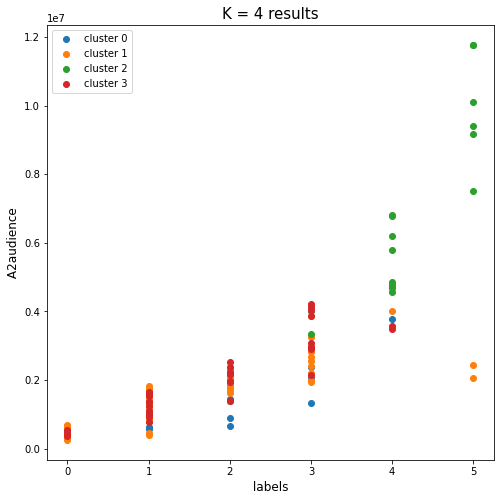

In [329]:
#시각화

plt.figure(figsize = (8, 8))
k = 4

for i in range(k):
    plt.scatter(dataset.loc[dataset[' cluster '] == i, ' labels '], dataset.loc[dataset[' cluster '] == i, ' A2audience '], label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(' labels ', size = 12)
plt.ylabel(' A2audience ', size = 12)
plt.show()

### 변수가 7이므로 2차원으로 시각화 힘듬. 차원축소 진행

In [330]:
from sklearn.decomposition import PCA #차원축소

In [331]:
X=df_scaled_var.copy()
pca=PCA(n_components=2)

In [332]:
pca.fit(X)
x_pca=pca.transform(X)

In [333]:
pca_df=pd.DataFrame(x_pca)
pca_df[' cluster '] = dataset[' cluster ']
pca_df

,0,1,cluster
0,1.232684,-0.173893,2
1,1.306693,-0.258288,2
2,-0.234098,-0.257442,1
3,0.488014,-0.151099,2
4,0.679835,-0.378928,2
...,...,...,...
150,-0.379338,-0.129990,1
151,-0.228418,0.338619,3
152,-0.193356,0.032864,1
153,-0.204560,0.226141,3


C:\Users\seehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


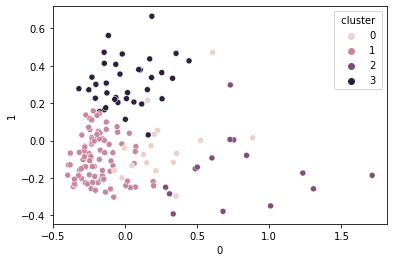

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
axs=plt.subplots()
axs=sns.scatterplot(0,1, hue=' cluster ', data=pca_df)

In [335]:
df_des=df_scaled_var.describe()
print(df_des)
print(df_des.iloc[5][0])

        Daudience_2    A1audience_2    A2audience_2    Dscreen_2   \
count     155.000000      155.000000      155.000000   155.000000   
mean        0.143816        0.173989        0.163654     0.280078   
std         0.165797        0.175842        0.179131     0.208502   
min         0.000000        0.000000        0.000000     0.000000   
25%         0.044998        0.077730        0.063478     0.150448   
50%         0.086228        0.125850        0.109657     0.213901   
75%         0.186020        0.200578        0.185520     0.346413   
max         1.000000        1.000000        1.000000     1.000000   

        A1screen_2    A2screen_2    Actscore_2   
count    155.000000    155.000000    155.000000  
mean       0.069470      0.365410      0.292387  
std        0.083541      0.183874      0.221380  
min        0.000000      0.000000      0.000000  
25%        0.038663      0.240576      0.120000  
50%        0.054159      0.337916      0.240000  
75%        0.072541      0.4

In [336]:
# scaled한 데이터 category형태 데이터 추가 하기위해 열 추가
df_scaled_var[' Daudience_category ']=1
df_scaled_var[' A1audience_category ']=1
df_scaled_var[' A2audience_category ']=1
df_scaled_var[' Dscreen_category ']=1
df_scaled_var[' A1screen_category ']=1
df_scaled_var[' A2screen_category ']=1
df_scaled_var[' Actscore_category ']=1
print(df_scaled_var)

      Daudience_2    A1audience_2    A2audience_2    Dscreen_2    A1screen_2   \
0         0.929337        1.000000        0.854587     0.619283      0.129814   
1         0.726253        0.810416        1.000000     0.840359      0.133156   
2         0.063762        0.100026        0.157243     0.100897      0.038739   
3         0.438187        0.554039        0.480349     0.507175      0.113407   
4         0.881258        0.472894        0.398822     0.603587      0.105127   
..             ...             ...             ...          ...           ...   
150       0.027292        0.034333        0.021265     0.130045      0.038587   
151       0.045470        0.035025        0.020311     0.185650      0.042537   
152       0.018004        0.022351        0.015275     0.293722      0.063502   
153       0.023119        0.024468        0.016098     0.246188      0.059780   
154       0.036229        0.031399        0.017232     0.166368      0.037448   

      A2screen_2    Actscor

In [337]:
# scaled한 데이터 category형태 데이터 추가
l1=[' Daudience_2 ', ' A1audience_2 ', ' A2audience_2 ', ' Dscreen_2 ', ' A1screen_2 ', ' A2screen_2 ', ' Actscore_2 ']
l2=[' Daudience_category ', ' A1audience_category ', ' A2audience_category ', ' Dscreen_category ', ' A1screen_category ', ' A2screen_category ', ' Actscore_category ']
for i in range(0,len(l1)):
    a=l1[i]
    b=l2[i]
    lower=df_des.iloc[5][i]
    higher=df_des.iloc[6][i]
    df_scaled_var.loc[df_scaled_var[a]<lower,b]=  0   #중앙값 이하 0
    df_scaled_var.loc[df_scaled_var[a]>=higher,b]=  2  #75%이상이면 2
    
    
df_scaled_var=df_scaled_var.fillna(value=1)  #결측데이터 (중앙값과 75% 사이의 데이터)  1로 변환

In [338]:
print(df_scaled_var)

      Daudience_2    A1audience_2    A2audience_2    Dscreen_2    A1screen_2   \
0         0.929337        1.000000        0.854587     0.619283      0.129814   
1         0.726253        0.810416        1.000000     0.840359      0.133156   
2         0.063762        0.100026        0.157243     0.100897      0.038739   
3         0.438187        0.554039        0.480349     0.507175      0.113407   
4         0.881258        0.472894        0.398822     0.603587      0.105127   
..             ...             ...             ...          ...           ...   
150       0.027292        0.034333        0.021265     0.130045      0.038587   
151       0.045470        0.035025        0.020311     0.185650      0.042537   
152       0.018004        0.022351        0.015275     0.293722      0.063502   
153       0.023119        0.024468        0.016098     0.246188      0.059780   
154       0.036229        0.031399        0.017232     0.166368      0.037448   

      A2screen_2    Actscor

In [339]:
#df_scaled_var와 기존 데이터 영화 제목 합치기
dataset_join=pd.concat([dataset,df_scaled_var],axis=1)

In [340]:
dataset_join.groupby(' cluster ').count() #cluster 기준 데이터개수 세기

,movie title,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,...,A1screen_2,A2screen_2,Actscore_2,Daudience_category,A1audience_category,A2audience_category,Dscreen_category,A1screen_category,A2screen_category,Actscore_category
cluster,,,,,,,,,,,,,,,,,,,,,
0,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
1,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
2,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [341]:
dataset_join.groupby(' cluster ').mean() #그룹별 평균
#Cluster 0=> 누적관객 하위 그룹, Cluster=1 => 누적관객 상위그룸, Cluster=2=> 누적관객 중간 그룹

,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,Month,...,A1screen_2,A2screen_2,Actscore_2,Daudience_category,A1audience_category,A2audience_category,Dscreen_category,A1screen_category,A2screen_category,Actscore_category
cluster,,,,,,,,,,,,,,,,,,,,,
0,215289.588235,1.099529e+06,1.520270e+06,2024.058824,2105.470588,1565.058824,0.705882,10.882353,3.882353,8.117647,...,0.130457,0.665215,0.251765,0.941176,0.705882,0.470588,2.000000,2.000000,1.941176,0.647059
1,135846.275862,9.580999e+05,1.443697e+06,977.517241,1128.206897,694.275862,0.517241,11.632184,2.919540,6.000000,...,0.056225,0.279058,0.174713,0.459770,0.471264,0.528736,0.333333,0.321839,0.367816,0.448276
2,725429.733333,4.509134e+06,7.164258e+06,1876.133333,1826.133333,1289.866667,0.666667,12.000000,2.333333,6.266667,...,0.109239,0.543178,0.280000,2.000000,2.000000,2.000000,1.866667,1.866667,1.533333,1.000000
3,195856.611111,1.339372e+06,2.002351e+06,1112.333333,1126.638889,873.305556,0.027778,14.055556,3.305556,7.194444,...,0.056106,0.358450,0.601111,0.888889,0.944444,0.916667,0.750000,0.750000,0.805556,1.972222


In [342]:
dataset_join.groupby(' cluster ').mean()[' labels ']
#cluster 1가 누적 관객이 제일 많음, 다음으로 cluster 2,3,1 순

 cluster 
0    1.882353
1    1.344828
2    4.333333
3    1.777778
Name:  labels , dtype: float64

In [343]:
dataset_join

,movie title,Daudience,A1audience,A2audience,Dscreen,A1screen,A2screen,Nationality,Grade,Season,...,A1screen_2,A2screen_2,Actscore_2,Daudience_category,A1audience_category,A2audience_category,Dscreen_category,A1screen_category,A2screen_category,Actscore_category
0,신과함께-인과 연,1246603,7339492,10099813,1967,2097,1108,0,12,3,...,0.129814,0.462528,0.40,2,2,2,2,2,2,2
1,어벤져스: 인피니티 워,980042,5977606,11775978,2460,2141,1615,1,12,1,...,0.133156,0.687361,0.28,2,2,2,2,2,2,1
2,보헤미안 랩소디,110477,874499,2061545,811,898,735,1,12,3,...,0.038739,0.297118,0.00,0,0,1,0,0,0,0
3,미션 임파서블: 폴아웃,601935,4135912,5785977,1717,1881,532,1,15,2,...,0.113407,0.207095,0.28,2,2,2,2,2,0,1
4,쥬라기 월드: 폴른 킹덤,1183496,3553008,4846217,1932,1772,930,1,12,2,...,0.105127,0.383592,0.08,2,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,나쁜 녀석들: 포에버,62608,402585,494139,876,896,302,1,19,4,...,0.038587,0.105100,0.12,0,0,0,0,0,0,0
151,국제수사,86468,407561,483144,1000,948,526,0,15,4,...,0.042537,0.204435,0.60,0,0,0,0,0,0,2
152,침입자,50416,316514,425085,1241,1224,823,0,15,4,...,0.063502,0.336142,0.28,0,0,0,1,1,0,1
153,장르만 로맨스,57130,331725,434581,1135,1175,688,0,15,4,...,0.059780,0.276275,0.48,0,0,0,1,1,0,2


In [344]:
#개봉 당일 스크린수 & Cluster 비율 확인
newdf_Ds=dataset_join.groupby([' cluster ',' Dscreen_category '],as_index=False).count()[[' cluster ',' Dscreen_category ','movie title']]

In [345]:
newdf_Ds

,cluster,Dscreen_category,movie title
0,0,2,17
1,1,0,61
2,1,1,23
3,1,2,3
4,2,1,2
5,2,2,13
6,3,0,15
7,3,1,15
8,3,2,6


In [346]:
flag0=(newdf_Ds[' Dscreen_category '])==0 #중앙값 이하
flag1=(newdf_Ds[' Dscreen_category '])==1 #중앙~75%
flag2=(newdf_Ds[' Dscreen_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_Ds[' cluster ']==i)
    print("Cluster"+str(i)+"의 Ds_0의 비율은"+str(round((newdf_Ds.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_Ds.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 Ds_1의 비율은"+str(round((newdf_Ds.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_Ds.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 Ds_2의 비율은"+str(round((newdf_Ds.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_Ds.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 Ds_0의 비율은0.0%
Cluster0의 Ds_1의 비율은0.0%
Cluster0의 Ds_2의 비율은100.0%

Cluster1의 Ds_0의 비율은70.11%
Cluster1의 Ds_1의 비율은26.44%
Cluster1의 Ds_2의 비율은3.45%

Cluster2의 Ds_0의 비율은0.0%
Cluster2의 Ds_1의 비율은13.33%
Cluster2의 Ds_2의 비율은86.67%

Cluster3의 Ds_0의 비율은41.67%
Cluster3의 Ds_1의 비율은41.67%
Cluster3의 Ds_2의 비율은16.67%



In [347]:
#개봉 1주일 스크린수 & Cluster 비율 확인
newdf_A1s=dataset_join.groupby([' cluster ',' A1screen_category '],as_index=False).count()[[' cluster ',' A1screen_category ','movie title']]

In [348]:
newdf_A1s

,cluster,A1screen_category,movie title
0,0,2,17
1,1,0,63
2,1,1,20
3,1,2,4
4,2,1,2
5,2,2,13
6,3,0,14
7,3,1,17
8,3,2,5


In [349]:
flag0=(newdf_A1s[' A1screen_category '])==0 #중앙값 이하
flag1=(newdf_A1s[' A1screen_category '])==1 #중앙~75%
flag2=(newdf_A1s[' A1screen_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_A1s[' cluster ']==i)
    print("Cluster"+str(i)+"의 A1s_0의 비율은"+str(round((newdf_A1s.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_A1s.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A1s_1의 비율은"+str(round((newdf_A1s.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_A1s.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A1s_2의 비율은"+str(round((newdf_A1s.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_A1s.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 A1s_0의 비율은0.0%
Cluster0의 A1s_1의 비율은0.0%
Cluster0의 A1s_2의 비율은100.0%

Cluster1의 A1s_0의 비율은72.41%
Cluster1의 A1s_1의 비율은22.99%
Cluster1의 A1s_2의 비율은4.6%

Cluster2의 A1s_0의 비율은0.0%
Cluster2의 A1s_1의 비율은13.33%
Cluster2의 A1s_2의 비율은86.67%

Cluster3의 A1s_0의 비율은38.89%
Cluster3의 A1s_1의 비율은47.22%
Cluster3의 A1s_2의 비율은13.89%



In [350]:
#개봉 2주일 스크린수 & Cluster 비율 확인
newdf_A2s=dataset_join.groupby([' cluster ',' A2screen_category '],as_index=False).count()[[' cluster ',' A2screen_category ','movie title']]

In [351]:
flag0=(newdf_A2s[' A2screen_category '])==0 #중앙값 이하
flag1=(newdf_A2s[' A2screen_category '])==1 #중앙~75%
flag2=(newdf_A2s[' A2screen_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_A2s[' cluster ']==i)
    print("Cluster"+str(i)+"의 A2s_0의 비율은"+str(round((newdf_A2s.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_A2s.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A2s_1의 비율은"+str(round((newdf_A2s.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_A2s.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A2s_2의 비율은"+str(round((newdf_A2s.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_A2s.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 A2s_0의 비율은0.0%
Cluster0의 A2s_1의 비율은5.88%
Cluster0의 A2s_2의 비율은94.12%

Cluster1의 A2s_0의 비율은68.97%
Cluster1의 A2s_1의 비율은25.29%
Cluster1의 A2s_2의 비율은5.75%

Cluster2의 A2s_0의 비율은13.33%
Cluster2의 A2s_1의 비율은20.0%
Cluster2의 A2s_2의 비율은66.67%

Cluster3의 A2s_0의 비율은41.67%
Cluster3의 A2s_1의 비율은36.11%
Cluster3의 A2s_2의 비율은22.22%



In [352]:
#개봉 당일 관객수 & Cluster 비율 확인
newdf_Da=dataset_join.groupby([' cluster ',' Daudience_category '],as_index=False).count()[[' cluster ',' Daudience_category ','movie title']]
newdf_Da

,cluster,Daudience_category,movie title
0,0,0,6
1,0,1,6
2,0,2,5
3,1,0,56
4,1,1,22
5,1,2,9
6,2,2,15
7,3,0,14
8,3,1,12
9,3,2,10


In [353]:
flag0=(newdf_Da[' Daudience_category '])==0 #중앙값 이하
flag1=(newdf_Da[' Daudience_category '])==1 #중앙~75%
flag2=(newdf_Da[' Daudience_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_Da[' cluster ']==i)
    print("Cluster"+str(i)+"의 Da_0의 비율은"+str(round((newdf_Da.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_Da.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 Da_1의 비율은"+str(round((newdf_Da.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_Da.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 Da_2의 비율은"+str(round((newdf_Da.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_Da.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 Da_0의 비율은35.29%
Cluster0의 Da_1의 비율은35.29%
Cluster0의 Da_2의 비율은29.41%

Cluster1의 Da_0의 비율은64.37%
Cluster1의 Da_1의 비율은25.29%
Cluster1의 Da_2의 비율은10.34%

Cluster2의 Da_0의 비율은0.0%
Cluster2의 Da_1의 비율은0.0%
Cluster2의 Da_2의 비율은100.0%

Cluster3의 Da_0의 비율은38.89%
Cluster3의 Da_1의 비율은33.33%
Cluster3의 Da_2의 비율은27.78%



In [354]:
#개봉 1주일 관객수 & Cluster 비율 확인
newdf_A1a=dataset_join.groupby([' cluster ',' A1audience_category '],as_index=False).count()[[' cluster ',' A1audience_category ','movie title']]

In [355]:
flag0=(newdf_A1a[' A1audience_category '])==0 #중앙값 이하
flag1=(newdf_A1a[' A1audience_category '])==1 #중앙~75%
flag2=(newdf_A1a[' A1audience_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_A1a[' cluster ']==i)
    print("Cluster"+str(i)+"의 A1a_0의 비율은"+str(round((newdf_A1a.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_A1a.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A1a_1의 비율은"+str(round((newdf_A1a.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_A1a.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A1a_2의 비율은"+str(round((newdf_A1a.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_A1a.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 A1a_0의 비율은52.94%
Cluster0의 A1a_1의 비율은23.53%
Cluster0의 A1a_2의 비율은23.53%

Cluster1의 A1a_0의 비율은62.07%
Cluster1의 A1a_1의 비율은28.74%
Cluster1의 A1a_2의 비율은9.2%

Cluster2의 A1a_0의 비율은0.0%
Cluster2의 A1a_1의 비율은0.0%
Cluster2의 A1a_2의 비율은100.0%

Cluster3의 A1a_0의 비율은38.89%
Cluster3의 A1a_1의 비율은27.78%
Cluster3의 A1a_2의 비율은33.33%



In [356]:
#개봉 2주일 관객수 & Cluster 비율 확인
newdf_A2a=dataset_join.groupby([' cluster ',' A2audience_category '],as_index=False).count()[[' cluster ',' A2audience_category ','movie title']]

In [357]:
flag0=(newdf_A2a[' A2audience_category '])==0 #중앙값 이하
flag1=(newdf_A2a[' A2audience_category '])==1 #중앙~75%
flag2=(newdf_A2a[' A2audience_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_A2a[' cluster ']==i)
    print("Cluster"+str(i)+"의 A2a_0의 비율은"+str(round((newdf_A2a.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_A2a.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A2a_1의 비율은"+str(round((newdf_A2a.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_A2a.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 A2a_2의 비율은"+str(round((newdf_A2a.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_A2a.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 A2a_0의 비율은70.59%
Cluster0의 A2a_1의 비율은11.76%
Cluster0의 A2a_2의 비율은17.65%

Cluster1의 A2a_0의 비율은58.62%
Cluster1의 A2a_1의 비율은29.89%
Cluster1의 A2a_2의 비율은11.49%

Cluster2의 A2a_0의 비율은0.0%
Cluster2의 A2a_1의 비율은0.0%
Cluster2의 A2a_2의 비율은100.0%

Cluster3의 A2a_0의 비율은38.89%
Cluster3의 A2a_1의 비율은30.56%
Cluster3의 A2a_2의 비율은30.56%



In [358]:
#ActorScore & Cluster 비율 확인
newdf_AS=dataset_join.groupby([' cluster ',' Actscore_category '],as_index=False).count()[[' cluster ',' Actscore_category ','movie title']]

In [359]:
flag0=(newdf_AS[' Actscore_category '])==0 #중앙값 이하
flag1=(newdf_AS[' Actscore_category '])==1 #중앙~75%
flag2=(newdf_AS[' Actscore_category '])==2 #75%~

for i in range(0,4):
    tmp=(newdf_AS[' cluster ']==i)
    print("Cluster"+str(i)+"의 AS_0의 비율은"+str(round((newdf_AS.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_AS.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 AS_1의 비율은"+str(round((newdf_AS.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_AS.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 AS_2의 비율은"+str(round((newdf_AS.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_AS.loc[tmp,'movie title'].sum())*100,2))+'%')
    
    print()

Cluster0의 AS_0의 비율은52.94%
Cluster0의 AS_1의 비율은29.41%
Cluster0의 AS_2의 비율은17.65%

Cluster1의 AS_0의 비율은60.92%
Cluster1의 AS_1의 비율은33.33%
Cluster1의 AS_2의 비율은5.75%

Cluster2의 AS_0의 비율은33.33%
Cluster2의 AS_1의 비율은33.33%
Cluster2의 AS_2의 비율은33.33%

Cluster3의 AS_0의 비율은0.0%
Cluster3의 AS_1의 비율은2.78%
Cluster3의 AS_2의 비율은97.22%



In [360]:
#Grade & Cluster 비율 확인
newdf_Gr=dataset_join.groupby([' cluster ',' Grade '],as_index=False).count()[[' cluster ',' Grade ','movie title']]

In [361]:
flag0=(newdf_Gr[' Grade '])==0 #전체이용가
flag1=(newdf_Gr[' Grade '])==1 #12세 이용가
flag2=(newdf_Gr[' Grade '])==2 #15세 이용가
flag3=(newdf_Gr[' Grade '])==3 #청소년 관람불가


for i in range(0,4):
    tmp=(newdf_Gr[' cluster ']==i)
    print("Cluster"+str(i)+"의 전체이용가의 비율은"+str(round((newdf_Gr.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_Gr.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 12세 이용가의 비율은"+str(round((newdf_Gr.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_Gr.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 15세 이용가의 비율은"+str(round((newdf_Gr.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_Gr.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 청소년 관람불가의 비율은"+str(round((newdf_Gr.loc[(tmp&flag3),'movie title'].sum()/
                                                    newdf_Gr.loc[tmp,'movie title'].sum())*100,2))+'%')
    print()

Cluster0의 전체이용가의 비율은11.76%
Cluster0의 12세 이용가의 비율은0.0%
Cluster0의 15세 이용가의 비율은0.0%
Cluster0의 청소년 관람불가의 비율은0.0%

Cluster1의 전체이용가의 비율은16.09%
Cluster1의 12세 이용가의 비율은0.0%
Cluster1의 15세 이용가의 비율은0.0%
Cluster1의 청소년 관람불가의 비율은0.0%

Cluster2의 전체이용가의 비율은6.67%
Cluster2의 12세 이용가의 비율은0.0%
Cluster2의 15세 이용가의 비율은0.0%
Cluster2의 청소년 관람불가의 비율은0.0%

Cluster3의 전체이용가의 비율은0.0%
Cluster3의 12세 이용가의 비율은0.0%
Cluster3의 15세 이용가의 비율은0.0%
Cluster3의 청소년 관람불가의 비율은0.0%



In [362]:
# SccialDistancing & Cluster 비율 확인
newdf_SD=dataset_join.groupby([' cluster ',' social distancing '],as_index=False).count()[[' cluster ',' social distancing ','movie title']]

In [363]:
newdf_SD

,cluster,social distancing,movie title
0,0,0,4
1,0,1,4
2,0,2,1
3,0,3,1
4,0,4,7
5,1,0,76
6,1,1,2
7,1,2,5
8,1,3,1
9,1,4,3


In [365]:
flag0=(newdf_SD[' social distancing '])==0 #사회적 거리두기 0
flag1=(newdf_SD[' social distancing '])==1 #1사회적 거리두기 1
flag2=(newdf_SD[' social distancing '])==2 #1사회적 거리두기 2
flag3=(newdf_SD[' social distancing '])==3 #사회적 거리두기 3
flag4=(newdf_SD[' social distancing '])==3 #사회적 거리두기 4


for i in range(0,4):
    tmp=(newdf_SD[' cluster ']==i)
    print("Cluster"+str(i)+"의 거리두기 0단계의 비율은"+str(round((newdf_SD.loc[(tmp&flag0),'movie title'].sum()/
                                                    newdf_SD.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 거리두기 1단계의 비율은"+str(round((newdf_SD.loc[(tmp&flag1),'movie title'].sum()/
                                                    newdf_SD.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 거리두기 2단계의 비율은"+str(round((newdf_SD.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_SD.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 거리두기 3단계의 비율은"+str(round((newdf_SD.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_SD.loc[tmp,'movie title'].sum())*100,2))+'%')
    print("Cluster"+str(i)+"의 거리두기 4단계의 비율은"+str(round((newdf_SD.loc[(tmp&flag2),'movie title'].sum()/
                                                    newdf_SD.loc[tmp,'movie title'].sum())*100,2))+'%')
    print()

Cluster0의 거리두기 0단계의 비율은23.53%
Cluster0의 거리두기 1단계의 비율은23.53%
Cluster0의 거리두기 2단계의 비율은5.88%
Cluster0의 거리두기 3단계의 비율은5.88%
Cluster0의 거리두기 4단계의 비율은5.88%

Cluster1의 거리두기 0단계의 비율은87.36%
Cluster1의 거리두기 1단계의 비율은2.3%
Cluster1의 거리두기 2단계의 비율은5.75%
Cluster1의 거리두기 3단계의 비율은5.75%
Cluster1의 거리두기 4단계의 비율은5.75%

Cluster2의 거리두기 0단계의 비율은100.0%
Cluster2의 거리두기 1단계의 비율은0.0%
Cluster2의 거리두기 2단계의 비율은0.0%
Cluster2의 거리두기 3단계의 비율은0.0%
Cluster2의 거리두기 4단계의 비율은0.0%

Cluster3의 거리두기 0단계의 비율은77.78%
Cluster3의 거리두기 1단계의 비율은5.56%
Cluster3의 거리두기 2단계의 비율은8.33%
Cluster3의 거리두기 3단계의 비율은8.33%
Cluster3의 거리두기 4단계의 비율은8.33%

